In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/RFID_23-24/3.1 Final Setup/dataset/condensed_data_NOAngle.csv')
data.head()

,A1_sd,A1_mean,A2_sd,A2_mean,A3_sd,A3_mean,A4_sd,A4_mean,x,y
0,0.455694,-66.878788,0.602957,-59.091898,1.126873,-59.759676,0.388383,-55.083102,8,3
1,1.092510,-61.473898,1.880662,-59.411015,0.365428,-55.353161,0.000000,0.000000,9,4
2,2.064072,-61.387911,0.448910,-53.873030,0.396486,-52.027826,0.450729,-55.686446,5,5
3,1.417068,-63.967837,1.179202,-58.408155,1.153554,-57.107136,1.088665,-57.945354,6,7
4,0.571581,-66.878788,1.183826,-62.419752,1.526860,-61.282731,0.869344,-56.629988,9,2


In [ ]:
data.describe()

,A1_sd,A1_mean,A2_sd,A2_mean,A3_sd,A3_mean,A4_sd,A4_mean,x,y
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,1.078401,-63.904277,0.921828,-56.980544,0.974063,-57.553638,0.900688,-58.089625,5.000000,5.000000
std,0.485464,1.938294,0.415737,3.692712,0.401526,3.411113,0.391397,9.027392,3.168832,3.168832
min,0.000000,-67.958333,0.272577,-65.519928,0.238884,-65.670300,0.000000,-67.885417,0.000000,0.000000
25%,0.774135,-65.481306,0.609557,-59.727364,0.661031,-59.961262,0.628644,-61.583081,2.000000,2.000000
50%,1.035098,-63.840729,0.862278,-57.307820,0.911462,-57.520034,0.878483,-59.403877,5.000000,5.000000
75%,1.291656,-62.281644,1.190598,-53.885449,1.233154,-55.040468,1.107549,-56.744568,8.000000,8.000000
max,3.802588,-59.683472,2.344798,-49.170286,2.589543,-49.655651,2.664738,0.000000,10.000000,10.000000


In [ ]:
# Replace NaN values with 0
data = data.fillna(0)
data.describe()

,A1_sd,A1_mean,A2_sd,A2_mean,A3_sd,A3_mean,A4_sd,A4_mean,x,y
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,1.078401,-63.904277,0.921828,-56.980544,0.974063,-57.553638,0.900688,-58.089625,5.000000,5.000000
std,0.485464,1.938294,0.415737,3.692712,0.401526,3.411113,0.391397,9.027392,3.168832,3.168832
min,0.000000,-67.958333,0.272577,-65.519928,0.238884,-65.670300,0.000000,-67.885417,0.000000,0.000000
25%,0.774135,-65.481306,0.609557,-59.727364,0.661031,-59.961262,0.628644,-61.583081,2.000000,2.000000
50%,1.035098,-63.840729,0.862278,-57.307820,0.911462,-57.520034,0.878483,-59.403877,5.000000,5.000000
75%,1.291656,-62.281644,1.190598,-53.885449,1.233154,-55.040468,1.107549,-56.744568,8.000000,8.000000
max,3.802588,-59.683472,2.344798,-49.170286,2.589543,-49.655651,2.664738,0.000000,10.000000,10.000000


In [ ]:
count = 0
for i in range(len(data['A1_mean'])):
    if data['A4_mean'][i] == 0:
        count +=1
print(count)

5


In [ ]:
df = data.drop(["A3_sd"], axis=1)
print(df.head())
df.describe()

      A1_sd    A1_mean     A2_sd    A2_mean    A3_mean     A4_sd    A4_mean  \
0  0.455694 -66.878788  0.602957 -59.091898 -59.759676  0.388383 -55.083102   
1  1.092510 -61.473898  1.880662 -59.411015 -55.353161  0.000000   0.000000   
2  2.064072 -61.387911  0.448910 -53.873030 -52.027826  0.450729 -55.686446   
3  1.417068 -63.967837  1.179202 -58.408155 -57.107136  1.088665 -57.945354   
4  0.571581 -66.878788  1.183826 -62.419752 -61.282731  0.869344 -56.629988   

   x  y  
0  8  3  
1  9  4  
2  5  5  
3  6  7  
4  9  2  


,A1_sd,A1_mean,A2_sd,A2_mean,A3_mean,A4_sd,A4_mean,x,y
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,1.078401,-63.904277,0.921828,-56.980544,-57.553638,0.900688,-58.089625,5.000000,5.000000
std,0.485464,1.938294,0.415737,3.692712,3.411113,0.391397,9.027392,3.168832,3.168832
min,0.000000,-67.958333,0.272577,-65.519928,-65.670300,0.000000,-67.885417,0.000000,0.000000
25%,0.774135,-65.481306,0.609557,-59.727364,-59.961262,0.628644,-61.583081,2.000000,2.000000
50%,1.035098,-63.840729,0.862278,-57.307820,-57.520034,0.878483,-59.403877,5.000000,5.000000
75%,1.291656,-62.281644,1.190598,-53.885449,-55.040468,1.107549,-56.744568,8.000000,8.000000
max,3.802588,-59.683472,2.344798,-49.170286,-49.655651,2.664738,0.000000,10.000000,10.000000


In [ ]:
predict = ['x','y']

In [ ]:
x = np.array(df.drop(predict, axis=1))
y = np.array(df[predict])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# mmx = MinMaxScaler()
# data_feature = pd.DataFrame(mmx.fit_transform(x))
# print(data_feature.describe())


Importing test data


In [ ]:
x_train, x_test, y_train, y_test =  sklearn.model_selection.train_test_split(x,y, test_size=None, shuffle=True)

**KNeighborsRegressor**

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

error = []

#Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    mae = mean_squared_error(y_test, pred_i)
    error.append(mae)

errorWithWeight = []

for i in range(1, 40):
  knn_weight = KNeighborsRegressor(n_neighbors=i,weights='distance')
  knn_weight.fit(x_train, y_train)
  pred_i = knn_weight.predict(x_test)
  mae_weight = mean_squared_error(y_test, pred_i)
  errorWithWeight.append(mae_weight)

errorWith_W_A = []

for i in range(1, 40):
  knn_wA = KNeighborsRegressor(n_neighbors=i,weights='distance',algorithm='kd_tree')
  knn_wA.fit(x_train, y_train)
  pred_i = knn_wA.predict(x_test)
  mae_wA = mean_squared_error(y_test, pred_i)
  errorWith_W_A.append(mae_wA)


print (error)
print (errorWithWeight)
print (errorWith_W_A)

[2.959016393442623, 3.3995901639344264, 3.7313296903460844, 3.612704918032787, 3.8331147540983608, 3.83424408014572, 4.179826028772164, 4.264600409836065, 4.2497470147743375, 4.393360655737706, 4.559341552635143, 4.650273224043716, 4.679842855757105, 4.6518484442957515, 4.636247723132969, 4.586257684426229, 4.594219751545749, 4.582903258449708, 4.617047363879932, 4.711987704918032, 4.614159324932159, 4.587657498983878, 4.588862375654653, 4.479607809653917, 4.6039868852459005, 4.586853720050442, 4.574343924981449, 4.6071637671462025, 4.611839925147658, 4.686475409836065, 4.727844970232511, 4.776519275102459, 4.874866398711406, 4.927519995462022, 4.987708263633322, 5.028511434932199, 5.00135913494354, 4.998558194450752, 4.965300007544647]
[2.959016393442623, 3.0081882995922213, 3.328624737216157, 3.2583095420569492, 3.3523318771765185, 3.375300444215431, 3.628410733608681, 3.702201660494528, 3.7523895582123377, 3.885398828082825, 3.999142311796008, 4.08095084309951, 4.121122001024149, 4.

[2.959016393442623, 3.3995901639344264, 3.7313296903460844, 3.612704918032787, 3.8331147540983608, 3.83424408014572, 4.179826028772164, 4.264600409836065, 4.2497470147743375, 4.393360655737706, 4.559341552635143, 4.650273224043716, 4.679842855757105, 4.6518484442957515, 4.636247723132969, 4.586257684426229, 4.594219751545749, 4.582903258449708, 4.617047363879932, 4.711987704918032, 4.614159324932159, 4.587657498983878, 4.588862375654653, 4.479607809653917, 4.6039868852459005, 4.586853720050442, 4.574343924981449, 4.6071637671462025, 4.611839925147658, 4.686475409836065, 4.727844970232511, 4.776519275102459, 4.874866398711406, 4.927519995462022, 4.987708263633322, 5.028511434932199, 5.00135913494354, 4.998558194450752, 4.965300007544647]


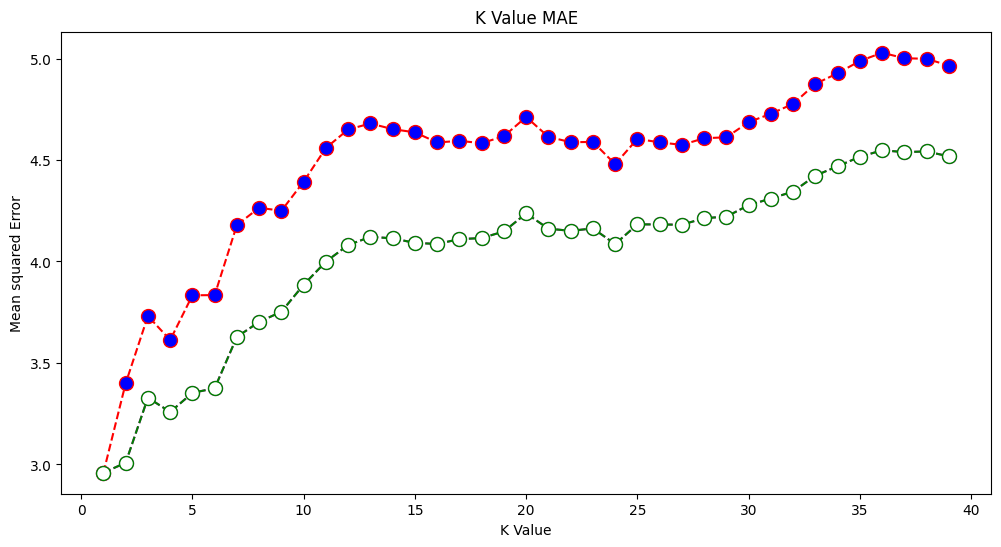

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.plot(range(1, 40), errorWithWeight, color='m',
         linestyle='dashed', marker='o',
         markerfacecolor='y', markersize=10)

plt.plot(range(1, 40), errorWith_W_A, color='g',
         linestyle='dashed', marker='o',
         markerfacecolor='w', markersize=10)


plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean squared Error')

print (error)


In [ ]:

model_k = KNeighborsRegressor(n_neighbors=1, weights='distance',algorithm='kd_tree')#,algorithm='brute'
model_k.fit(x_train,y_train)


predictions = model_k.predict(x_test)
y_train_pred = model_k.predict(x_train)

print('R squared on training set:')
print(r2_score(y_train, y_train_pred))

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model_k, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MSE with Orignal data: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f'mae with test data: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

acc =  model_k.score(x_test, y_test)
print(acc)

R squared on training set:
1.0
MSE with Orignal data: 2.111 (1.529)
mae with test data: 0.8278688524590164
mse: 2.959016393442623
rmse: 1.6924653036227242
0.6671162342241197


Find the Best Parameters for KNeighborsRegressor



Text(0.5, 1.0, 'Blue: Test data , Orange is Predictions Using KNeighborsRegressor')

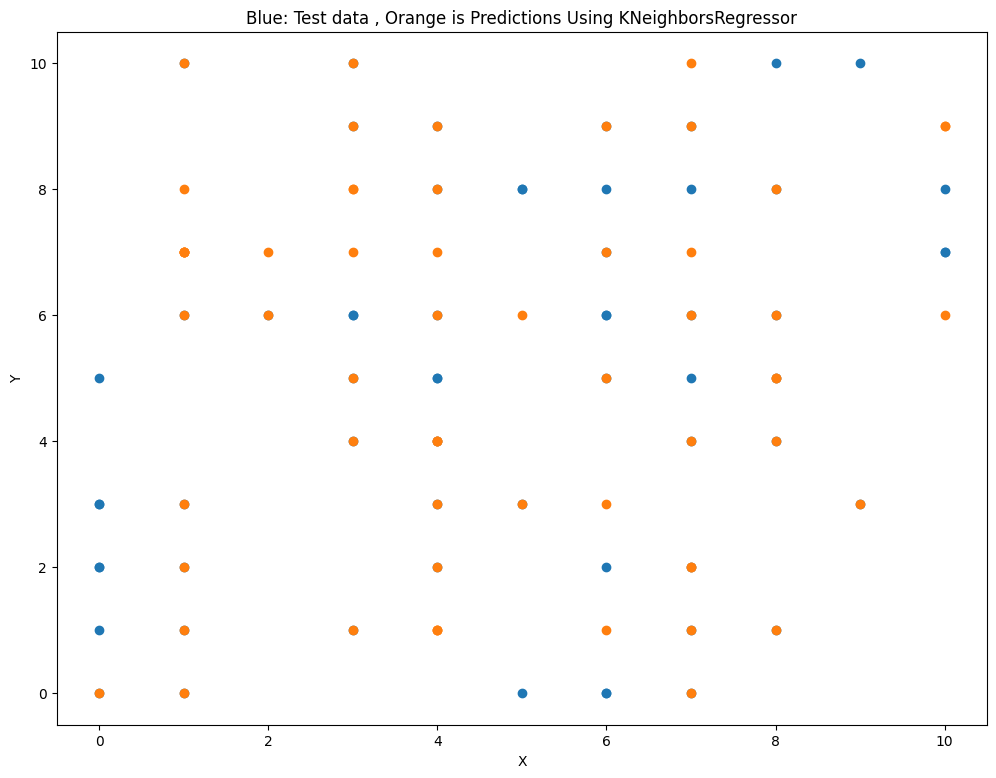

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(*zip(*y_test))
plt.scatter(*zip(*predictions))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue: Test data , Orange is Predictions Using KNeighborsRegressor')

In [ ]:
over_lap = []
for i in range(len(predictions)):
    if (predictions[i][0] == y_test[i][0] and predictions[i][1] == y_test[i][1]):
        over_lap.append(predictions[i])

In [ ]:
over_lap

[array([7., 1.]),
 array([4., 9.]),
 array([3., 4.]),
 array([4., 4.]),
 array([4., 2.]),
 array([1., 1.]),
 array([4., 8.]),
 array([ 3., 10.]),
 array([9., 3.]),
 array([8., 4.]),
 array([8., 8.]),
 array([1., 6.]),
 array([6., 9.]),
 array([ 1., 10.]),
 array([5., 3.]),
 array([7., 0.]),
 array([7., 4.]),
 array([1., 0.]),
 array([0., 0.]),
 array([7., 2.]),
 array([3., 5.]),
 array([1., 2.]),
 array([8., 5.]),
 array([7., 9.]),
 array([8., 1.]),
 array([4., 3.]),
 array([6., 5.])]

<ipython-input-47-fd095712aefa>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')


Text(0.5, 1.0, 'Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

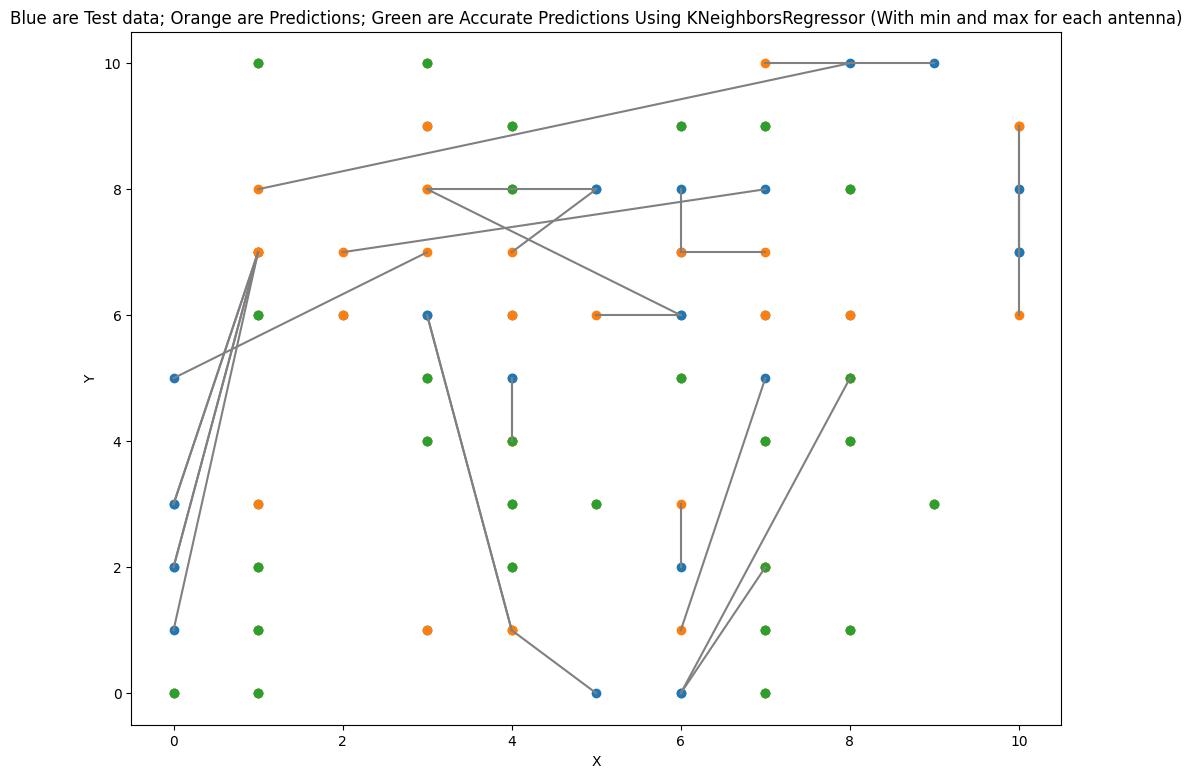

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(*zip(*y_test))
plt.scatter(*zip(*predictions))
plt.scatter(*zip(*over_lap))
for i in range(0, len(y_test)):
    # if (y_test[i][0] == predictions[i][0] and y_test[i][1] == predictions[i][1]) :
    #     plt.plot(predictions[i])
    # else:
    plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

In [ ]:
from sklearn.model_selection import cross_val_score

# for the knn Classifier:
scores = cross_val_score(model_k, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)

knn_rmse_scores = np.sqrt(-scores)

print('Scores: {}\nMean: {}\nStandard deviation: {}'.format(
    knn_rmse_scores, knn_rmse_scores.mean(), knn_rmse_scores.std()))

Scores: [2.06319092 1.30703226 1.73605555 1.86711304 2.19532331]
Mean: 1.8337430173166402
Standard deviation: 0.30707239105685047


In [ ]:
data_test = pd.read_csv('/content/drive/Shareddrives/RFID_23-24/3.1 Final Setup/dataset/condensed_data_r5.csv')
data_test.head()

,A1_sd,A1_mean,A2_sd,A2_mean,A3_sd,A3_mean,A4_sd,A4_mean,x,y
0,1.064916,-62.159143,0.345426,-50.237500,0.557548,-56.173611,0.934130,-60.730939,1,4
1,0.581023,-67.134058,0.565905,-57.981513,1.169005,-55.828784,0.299721,-54.733190,7,1
2,1.178610,-65.474830,0.388335,-54.330417,0.482054,-57.917361,1.191207,-61.923241,2,0
3,1.207373,-63.543135,1.000057,-54.836045,0.889776,-53.994861,0.701560,-54.218704,7,2
4,0.976794,-65.708169,0.678396,-61.037124,0.760380,-60.326539,0.459224,-55.386973,9,3


In [ ]:
# Check for NaN values in each column
nan_check = data_test.isna().sum()

# Display the count of NaN values in each column
print(nan_check)

A1_sd      0
A1_mean    0
A2_sd      0
A2_mean    0
A3_sd      0
A3_mean    0
A4_sd      0
A4_mean    0
x          0
y          0
dtype: int64


In [ ]:
count = 0
for i in range(len(data_test['A1_mean'])):
    if data_test['A4_mean'][i] == 0:
        count +=1
print(count)

0


In [ ]:
data_test = data_test.drop(["A3_sd"], axis=1)
print(data_test.head())
data_test.describe()

      A1_sd    A1_mean     A2_sd    A2_mean    A3_mean     A4_sd    A4_mean  \
0  1.064916 -62.159143  0.345426 -50.237500 -56.173611  0.934130 -60.730939   
1  0.581023 -67.134058  0.565905 -57.981513 -55.828784  0.299721 -54.733190   
2  1.178610 -65.474830  0.388335 -54.330417 -57.917361  1.191207 -61.923241   
3  1.207373 -63.543135  1.000057 -54.836045 -53.994861  0.701560 -54.218704   
4  0.976794 -65.708169  0.678396 -61.037124 -60.326539  0.459224 -55.386973   

   x  y  
0  1  4  
1  7  1  
2  2  0  
3  7  2  
4  9  3  


,A1_sd,A1_mean,A2_sd,A2_mean,A3_mean,A4_sd,A4_mean,x,y
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.084725,-64.210365,0.805912,-56.803883,-57.402054,0.774401,-59.114727,4.766667,4.633333
std,0.435491,1.411656,0.393726,3.710583,2.875115,0.257661,3.073764,3.092631,3.448971
min,0.456852,-67.134058,0.315244,-62.790844,-63.427718,0.297235,-65.725496,0.000000,0.000000
25%,0.822622,-65.411080,0.506045,-59.402164,-60.017908,0.612896,-61.442797,2.000000,2.000000
50%,1.065564,-63.791608,0.673731,-56.889566,-57.632735,0.780067,-58.819067,4.500000,3.500000
75%,1.243204,-63.395803,1.020916,-53.675625,-55.332269,0.933845,-57.710357,7.000000,8.000000
max,2.759964,-61.694114,1.954722,-50.237500,-52.243726,1.287035,-53.422031,10.000000,10.000000


In [ ]:
ox_test = np.array(data_test.drop(predict, axis=1))
oy_test = np.array(data_test[predict])

# data_feature_test = pd.DataFrame(mmx.fit_transform(x_test))
# print(data_feature_test.describe())


In [ ]:
predictions = model_k.predict(ox_test)

In [ ]:
len(predictions)

30

In [ ]:
len(oy_test)

30

In [ ]:
over_lap = []
for i in range(len(predictions)):
    if (predictions[i][0] == oy_test[i][0] and predictions[i][1] == oy_test[i][1]):
        over_lap.append(predictions[i])

<ipython-input-58-d27900c5d90c>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([oy_test[i][0],predictions[i][0]], [oy_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')


Text(0.5, 1.0, 'Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

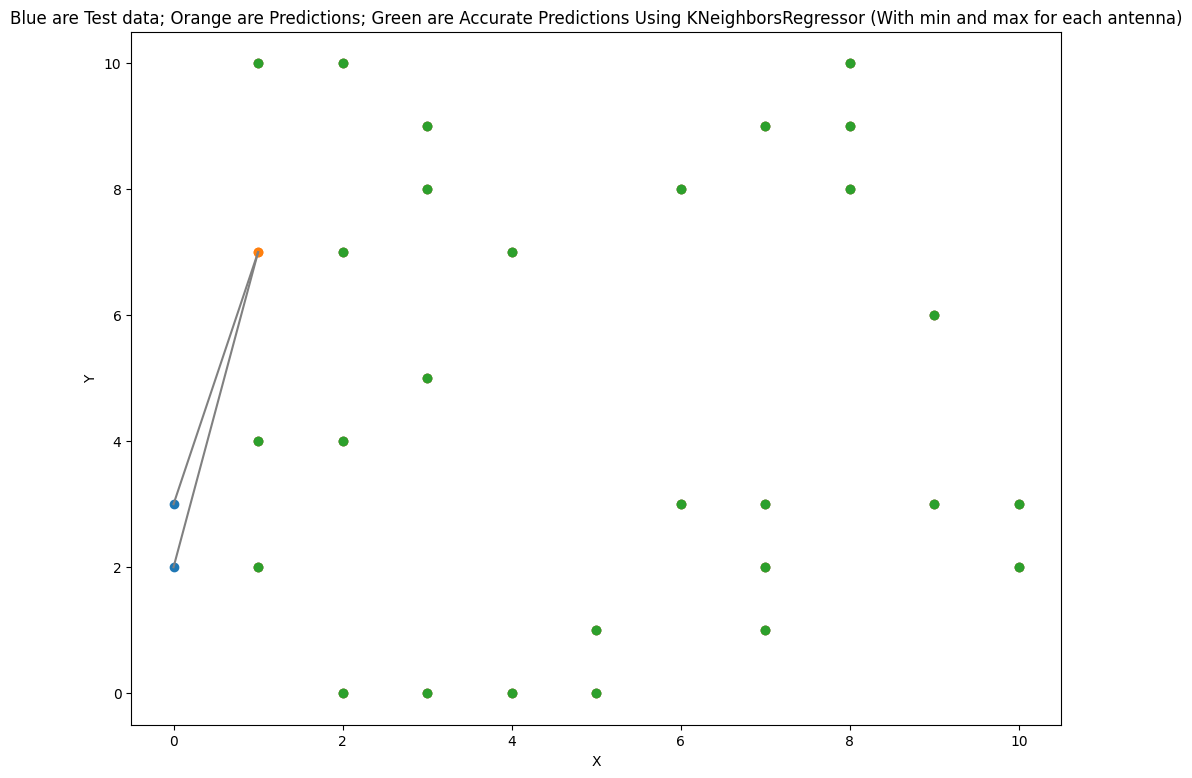

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(*zip(*oy_test))
plt.scatter(*zip(*predictions))
plt.scatter(*zip(*over_lap))
for i in range(0, len(oy_test)):
    # if (y_test[i][0] == predictions[i][0] and y_test[i][1] == predictions[i][1]) :
    #     plt.plot(predictions[i])
    # else:
    plt.plot([oy_test[i][0],predictions[i][0]], [oy_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

In [ ]:
mae = mean_absolute_error(oy_test, predictions)
mse = mean_squared_error(oy_test, predictions)
rmse = mean_squared_error(oy_test, predictions, squared=False)

print(f'mae with test data: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

acc =  model_k.score(ox_test, oy_test)
print(acc)

mae with test data: 0.18333333333333332
mse: 0.7166666666666667
rmse: 0.7136220420985866
0.9369686326022442


In [ ]:
from joblib import dump
# Save the model to a file with .pkl extension
dump(model_DT, 'decision_tree_model.pkl')


NameError: name 'model_DT' is not defined